In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import ssts.segmentation.segmentation_gmm as seg_gmm
import ssts.segmentation.segmentation_watershed as seg_water
from methods import main_methods as mm
from methods import config


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
# 2 component data
data_file = "/Users/diegotorrejon/Projects/Other/SSTS/data/2componentfilms/combined/PTB7PC71BM_CBonly_ascast_fresh_500_nm_combined.npy"
data_type = "QNM"
data_subtype = "2ComponentFilms"

# cAFM data
data_file = "/Users/diegotorrejon/Dropbox/SSTS_files/Manuscript/data_files/WT2-97_cafm.npy"
data_type = "cAFM"
data_subtype = None

#data_file = "/Users/diegotorrejon/Dropbox/SSTS_files/Manuscript/data_files/WT2-97_cAFM0003.npy"
#data_type = "cAFM"
#data_subtype = None


# AMFM data
data_file = "/Users/diegotorrejon/Dropbox/SSTS_files/Manuscript/data_files/WT2-107_amfm_90.npy"
data_type = "AMFM"
data_subtype = None

# nanowires data
#data_file = "/Users/diegotorrejon/Projects/Other/SSTS/data/nanowires/combined/100-0_48_NW_combined.npy"
#data_type = "QNM"
#data_subtype = "Nanowires"

data = np.load(data_file)

data_properties = config.data_info[data_type]['properties']


/Users/diegotorrejon/Projects/Other/SSTS/VENV/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/diegotorrejon/Projects/Other/SSTS/VENV/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


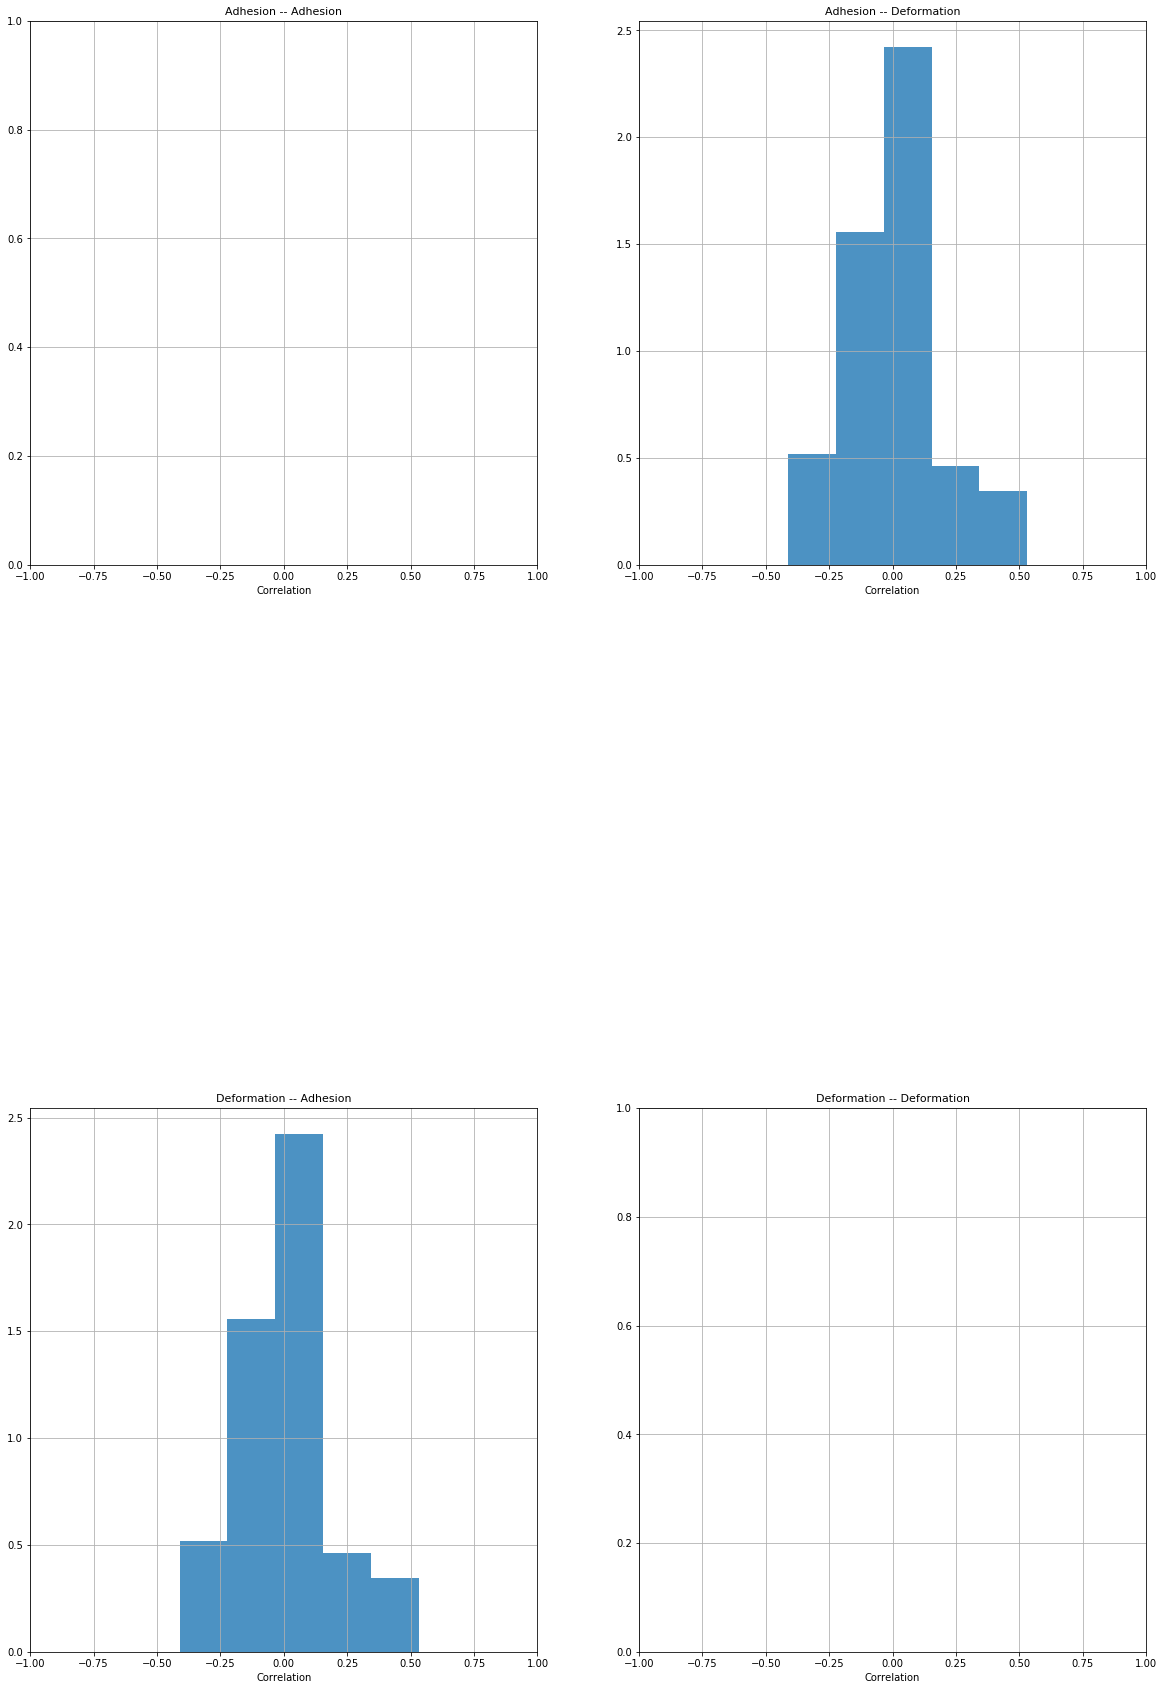

In [62]:
# NOTE: I picked backgrounded because it has the most data files
data_dir = "/Users/diegotorrejon/Dropbox/SSTS_files/AFM/QNM/Backgrounded/Combined/"
mm.show_correlations(data.shape[2], "QNM", data_dir)


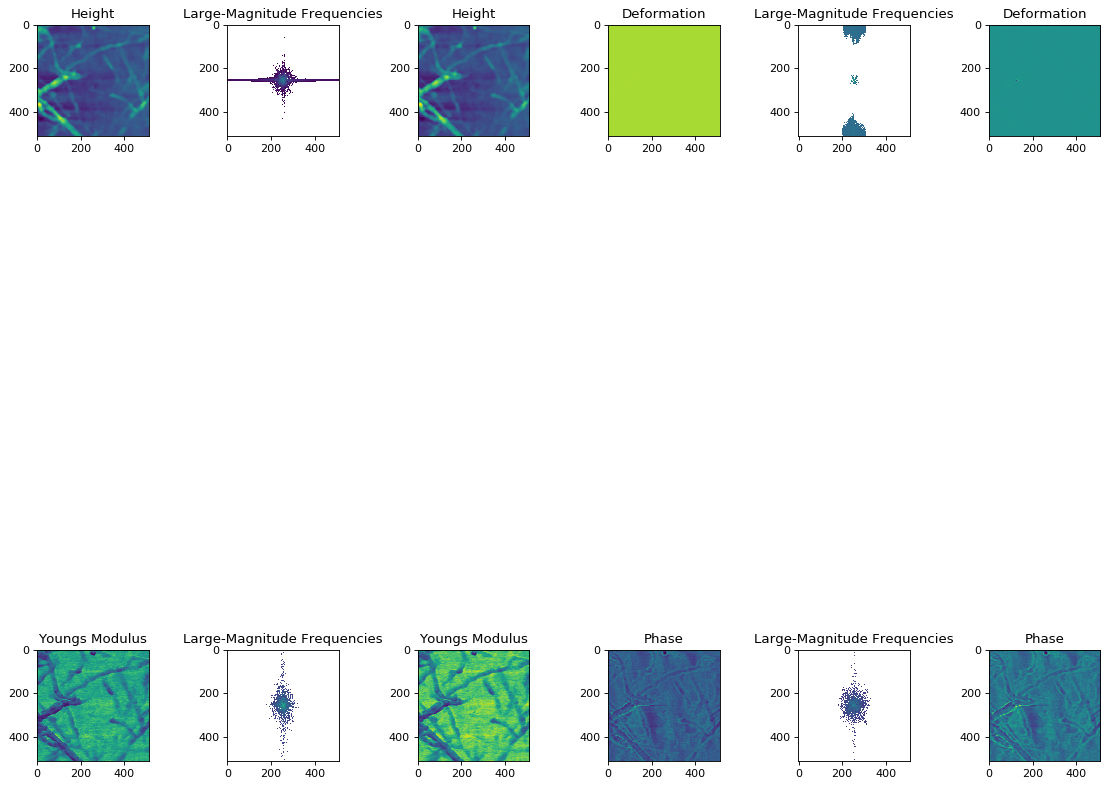

In [82]:
# Apply high pass filter
data = mm.apply_frequency_removal(data, data_type)


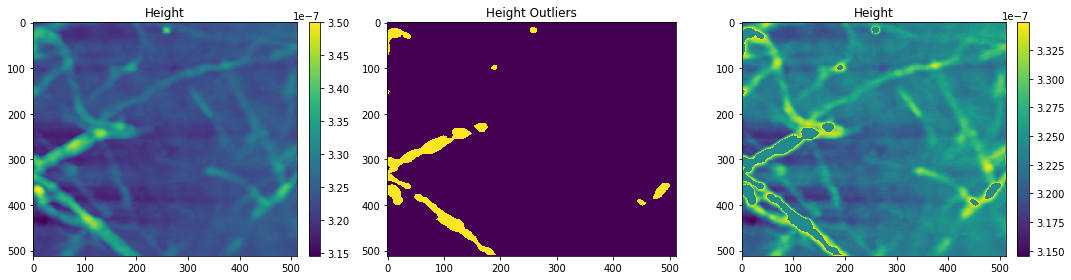

In [83]:
# Get (z-score) outliers
outliers = mm.extract_outliers(data, data_type)
mm.show_outliers(data, data_type, outliers)

no_outliers_data = mm.smooth_outliers_from_data(data, outliers)


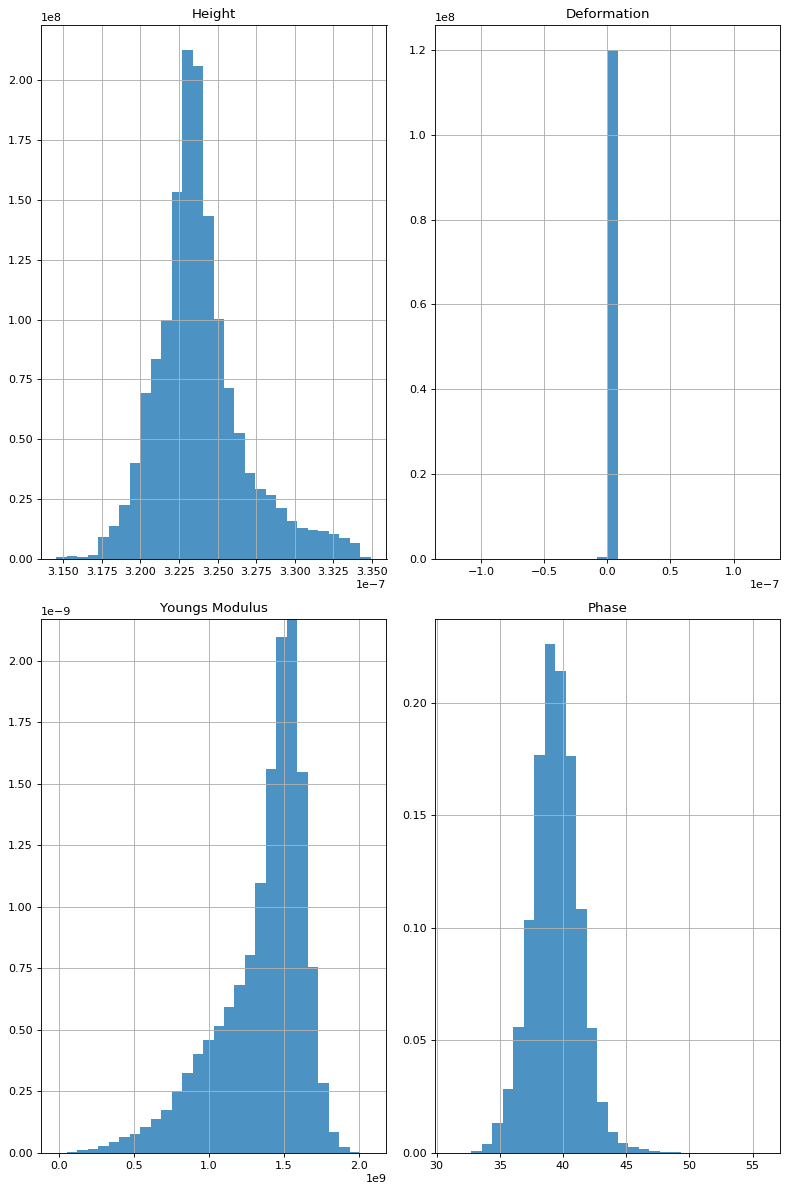

In [84]:
# Show a-priori property distributions
mm.show_property_distributions(data, data_type, outliers)


In [85]:
# Apply semantic segmentation (GMM)
c = data.shape[2]
num_pca_components = min(4, c)
seg = seg_gmm.SegmenterGMM(n_components=2, embedding_dim=num_pca_components,
                           nonlinear=True, normalize=True,
                          padding=0, zscale=False)

pre_labels = seg.fit_transform(no_outliers_data, outliers)


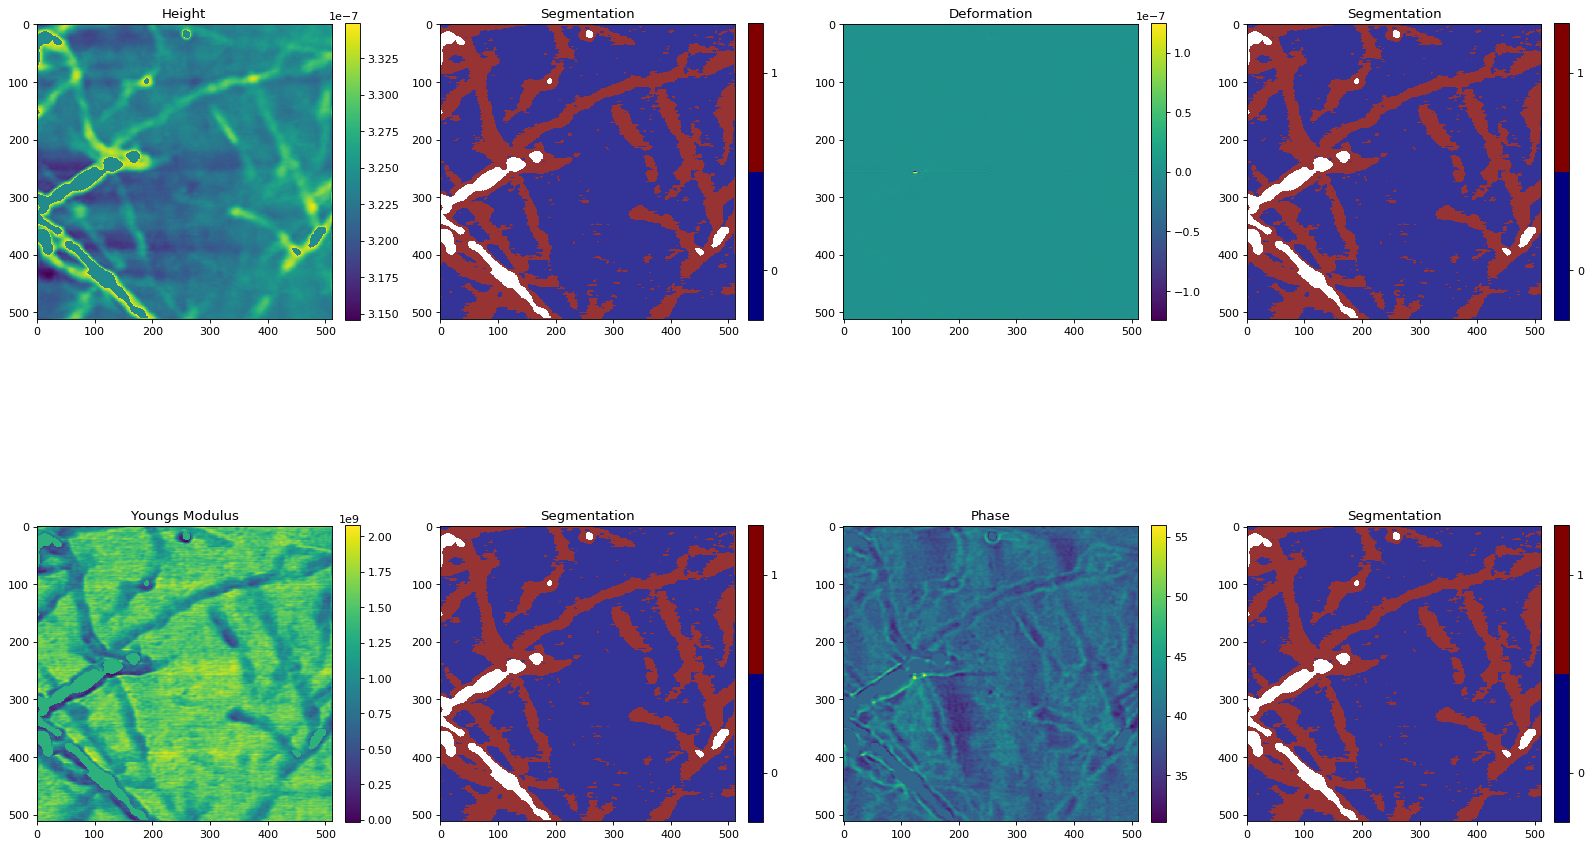

In [86]:
# Semantic segmentation of properties
mm.show_classification(pre_labels, no_outliers_data, data_type)


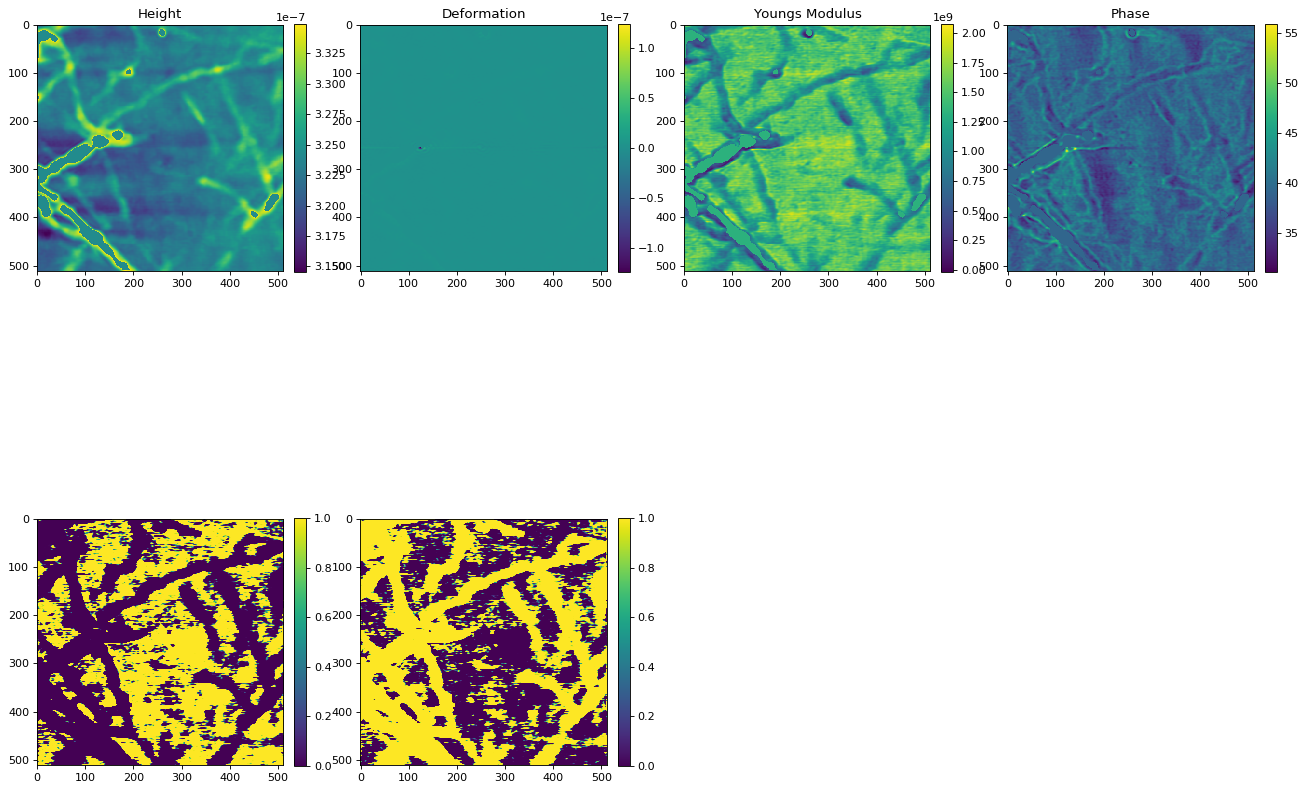

In [87]:
# Semantic segmentation likelihood of properties
probs = seg.get_probabilities(data)
mm.show_overlaid_distribution(probs, no_outliers_data, data_type)


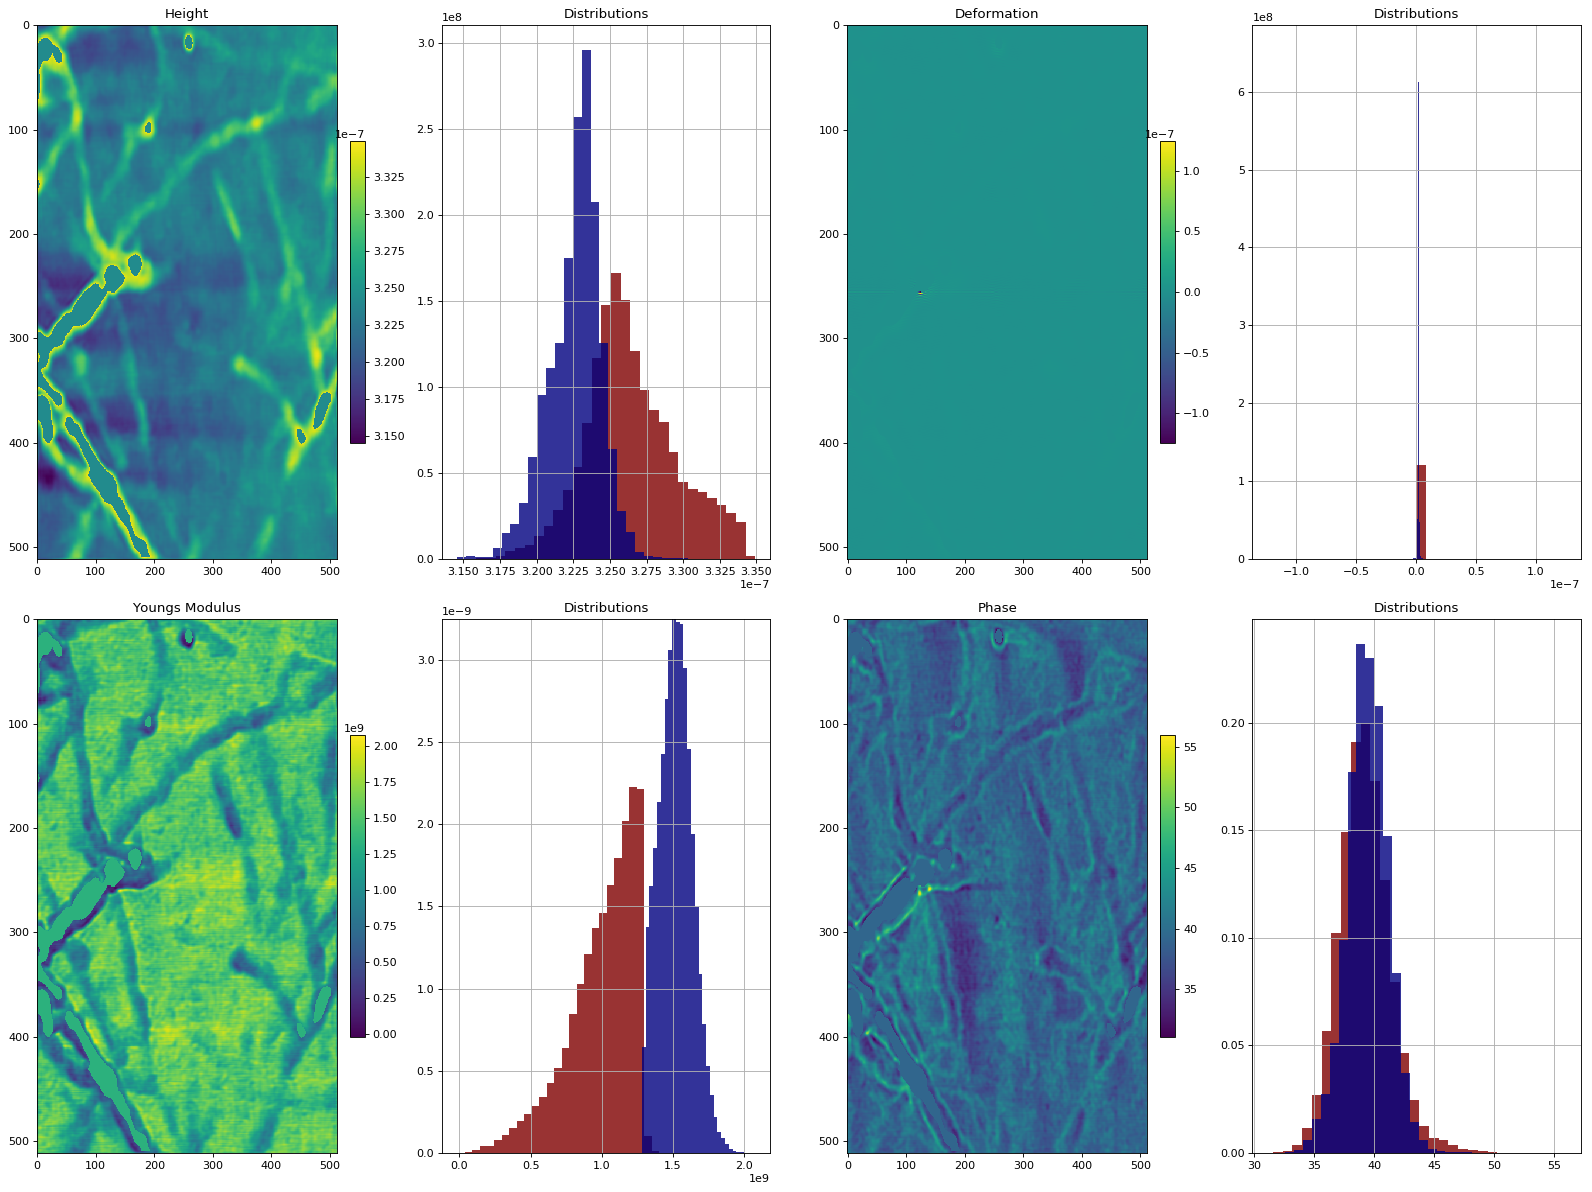

In [88]:
# Distributions of properties after semantic segmentation
mm.show_classification_distributions(pre_labels, no_outliers_data, data_type)


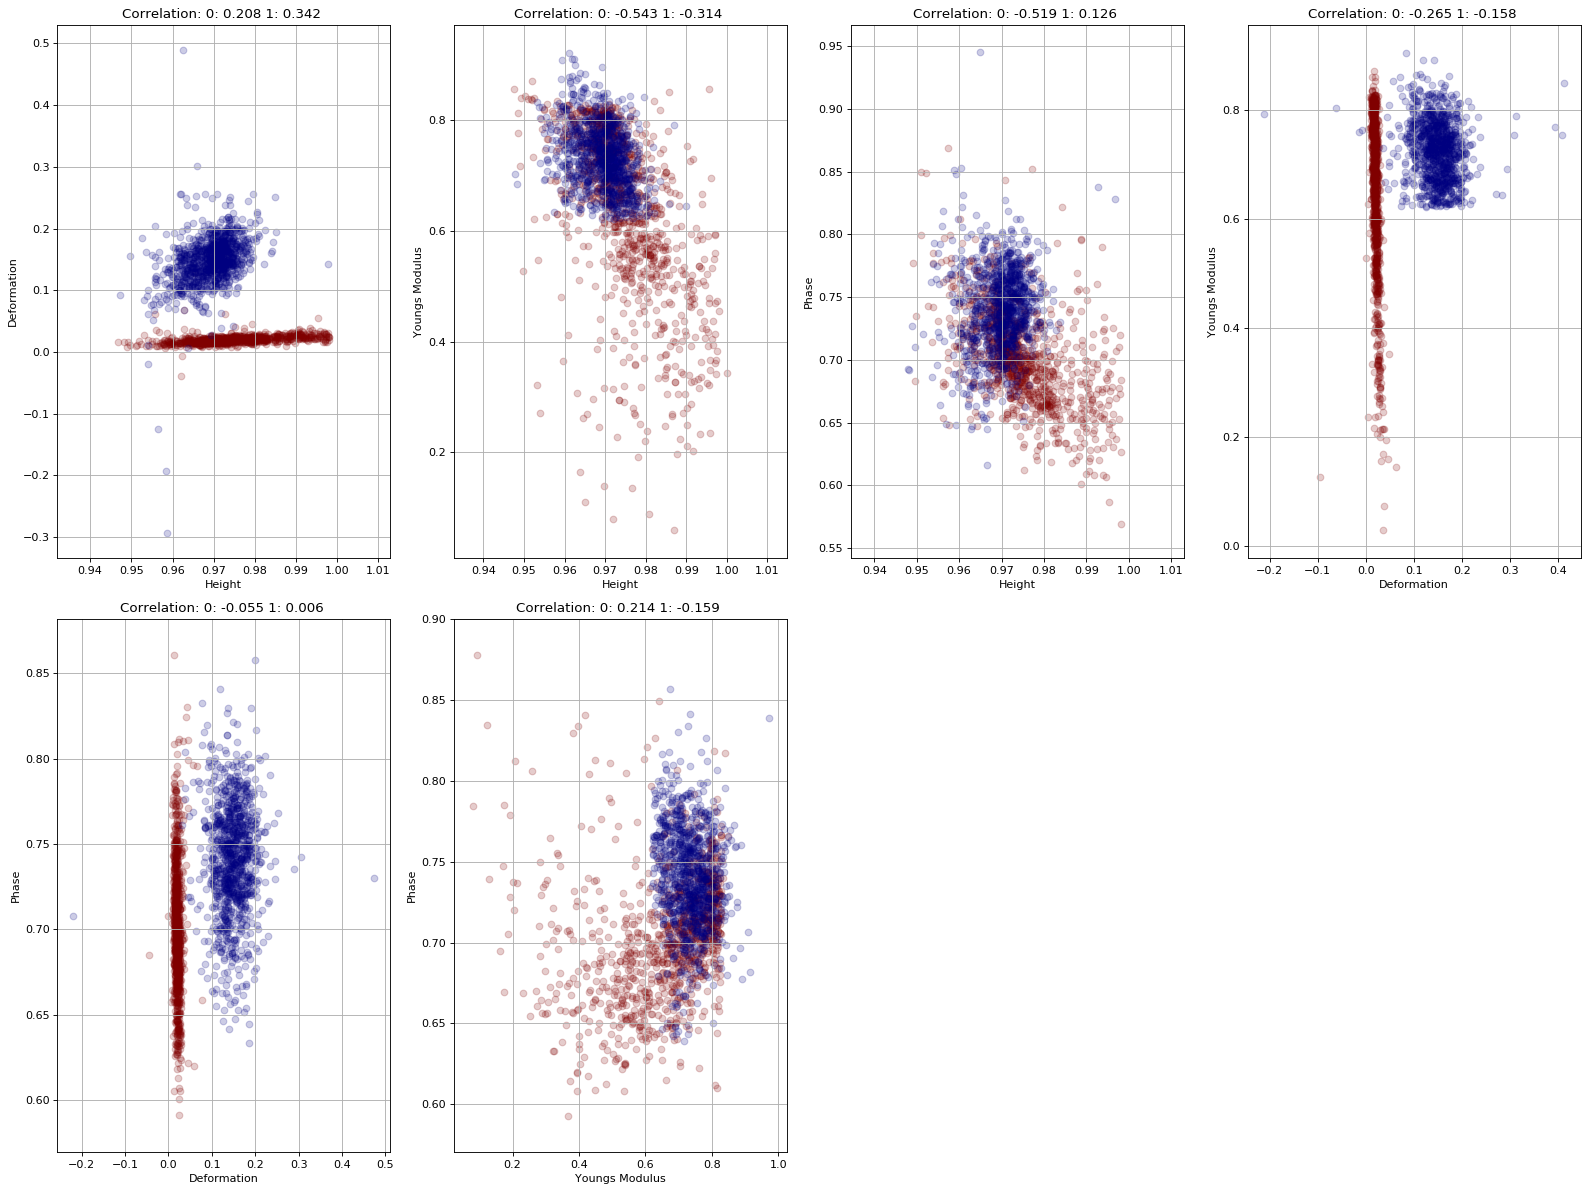

In [89]:
# Scatter plot and correlation of properties after semantic segmentation
mm.show_classification_correlation(pre_labels, no_outliers_data, data_type)


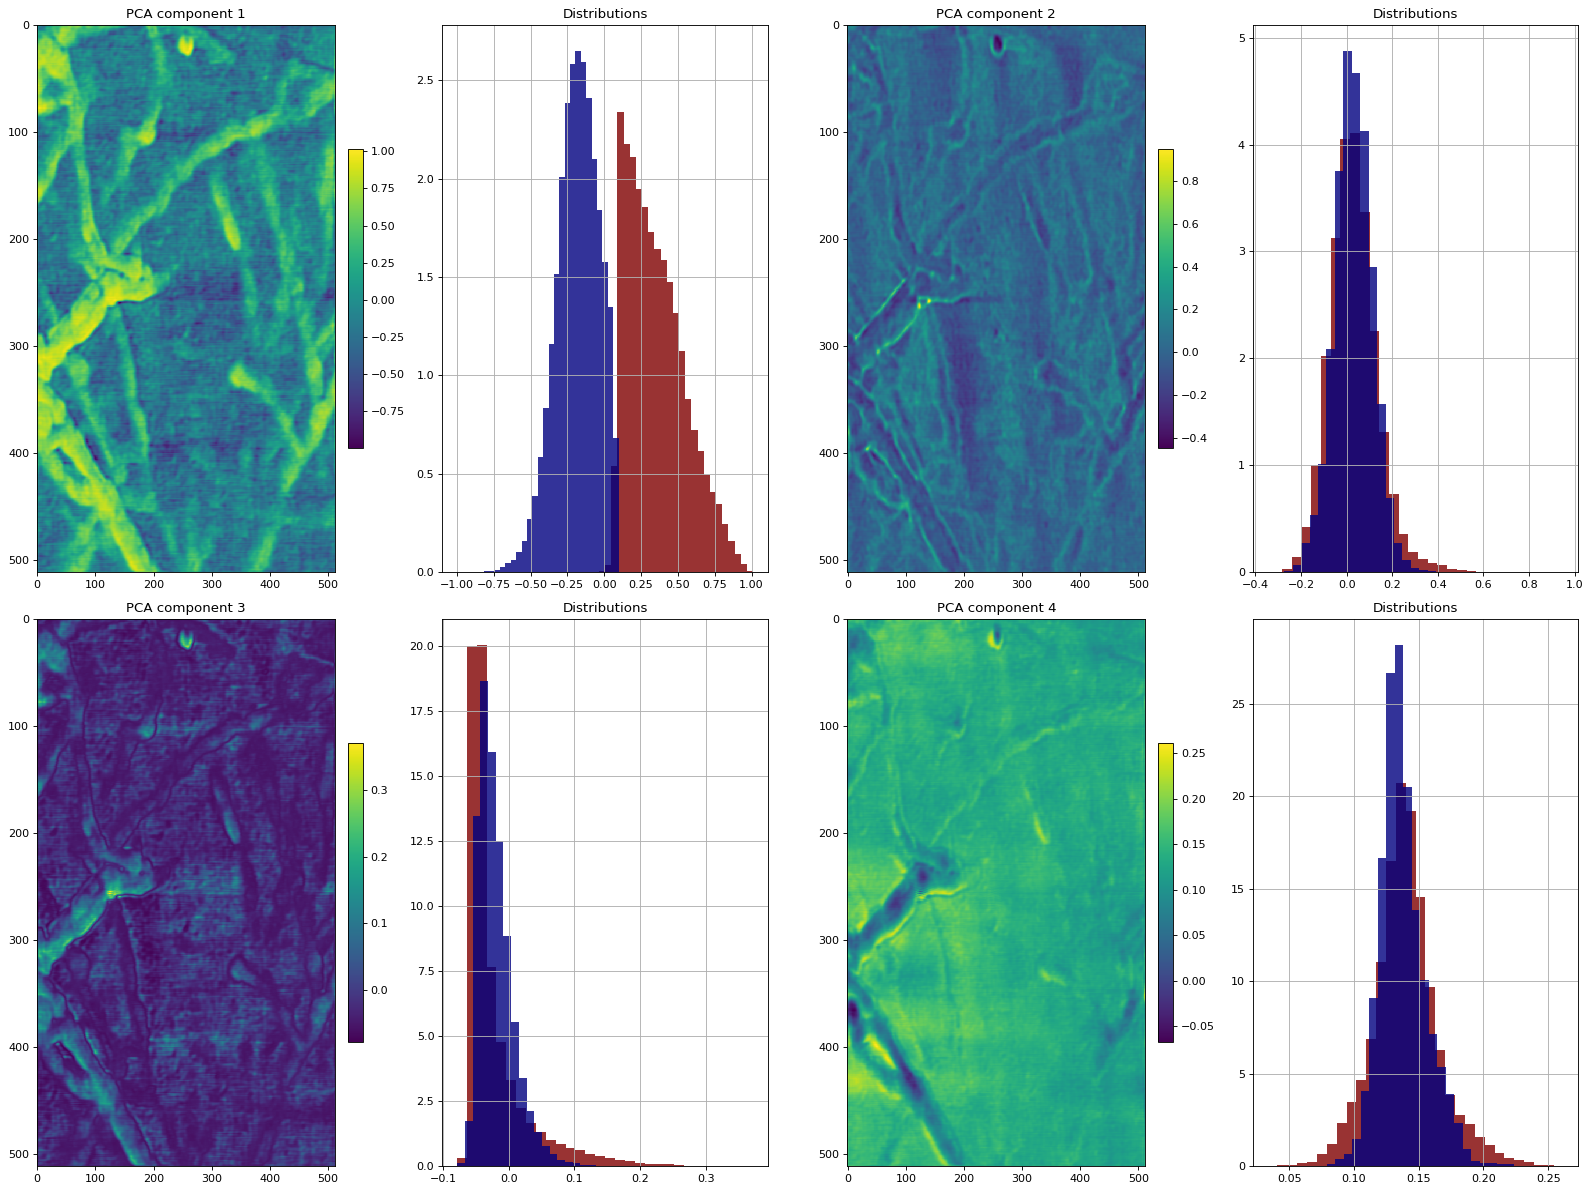

In [90]:
# Distributions of PCA components after semantic segmentation
h, w, c = data.shape
pca_components = seg.get_pca_components(data)
pca_components = pca_components.reshape(h, w, num_pca_components)

mm.show_classification_distributions(pre_labels, pca_components, data_type, title_flag=False)


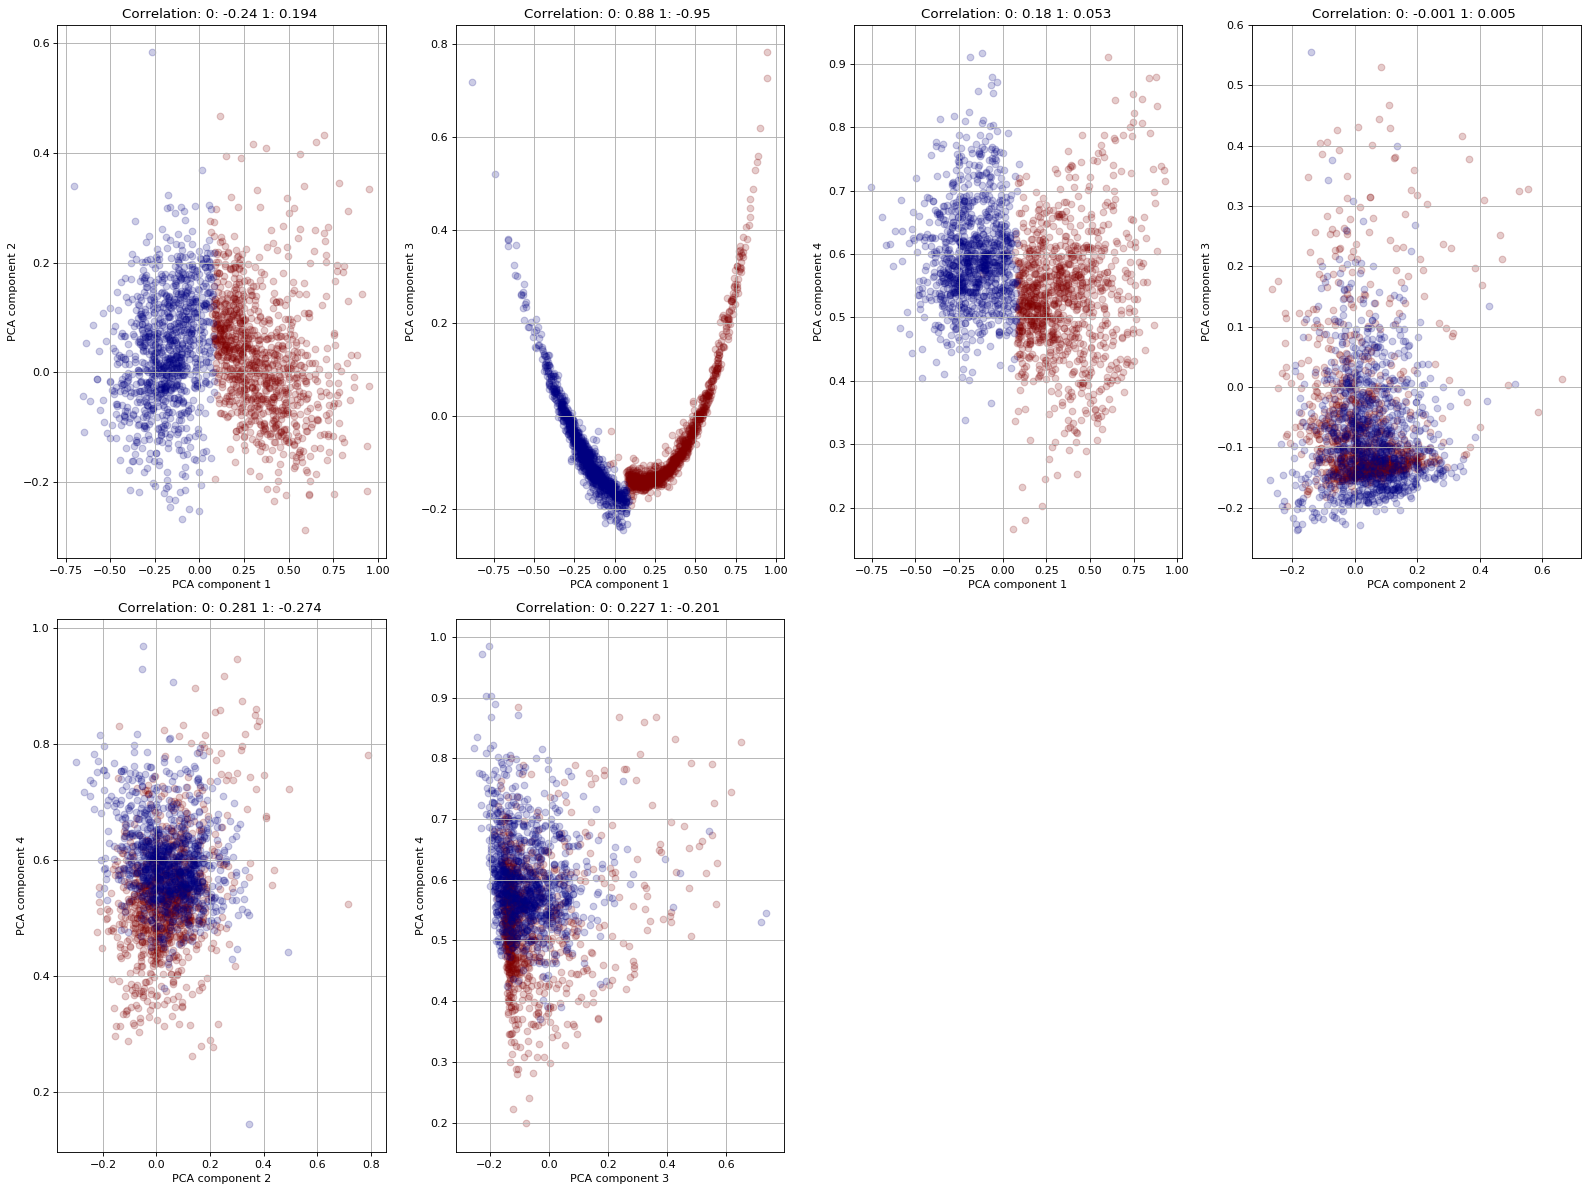

In [91]:
# Scatter plot and correlation of PCA components after semantic segmentation
mm.show_classification_correlation(pre_labels, pca_components, data_type, title_flag=False)


In [92]:
# Apply instance segmentation (connected components)
post_labels = seg.get_grains(pre_labels)


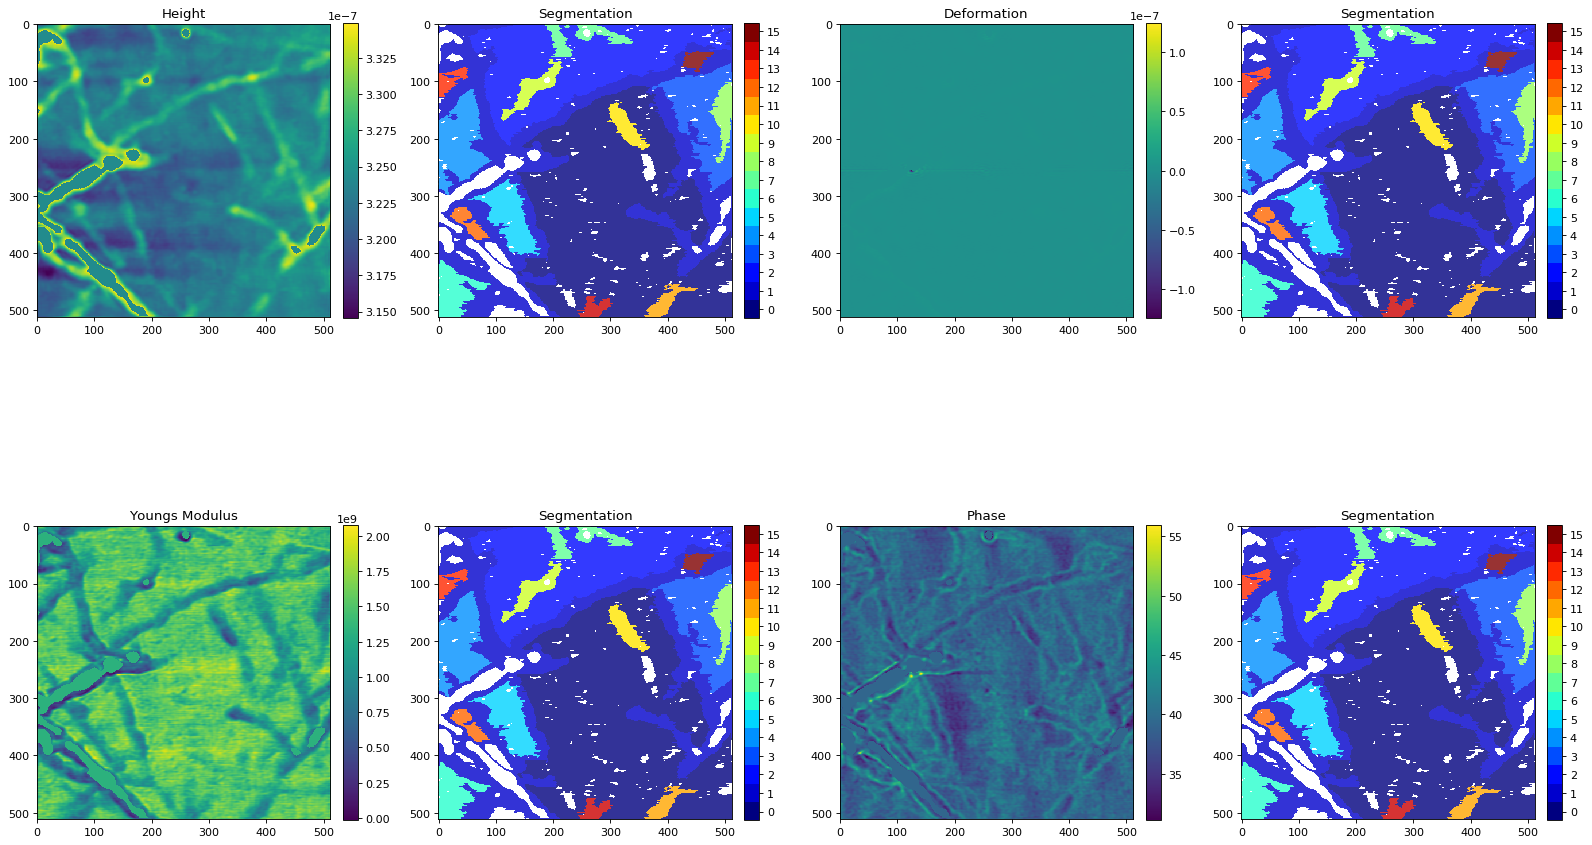

In [93]:
# Instance (grains) segmentation of properties
mm.show_classification(post_labels, no_outliers_data, data_type)


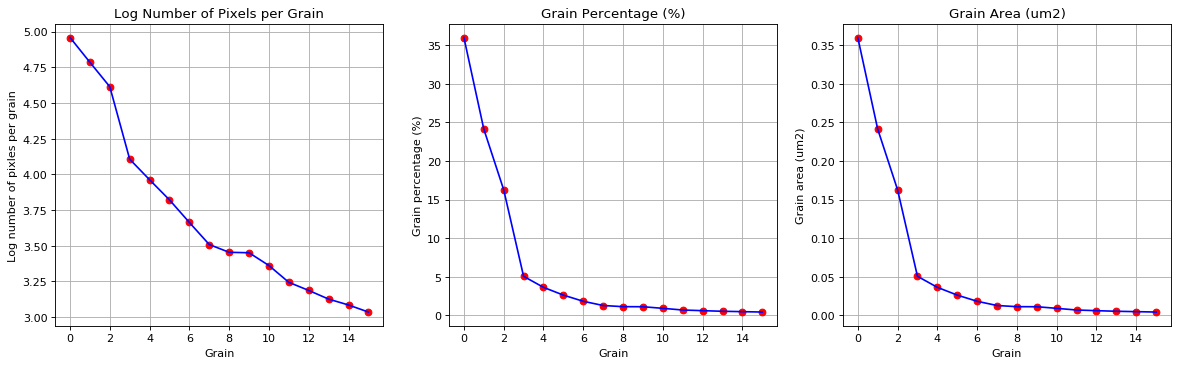

In [94]:
# Show grain area distribution after instance segmentation
mm.show_grain_area_distribution(post_labels, data_type, data_subtype)


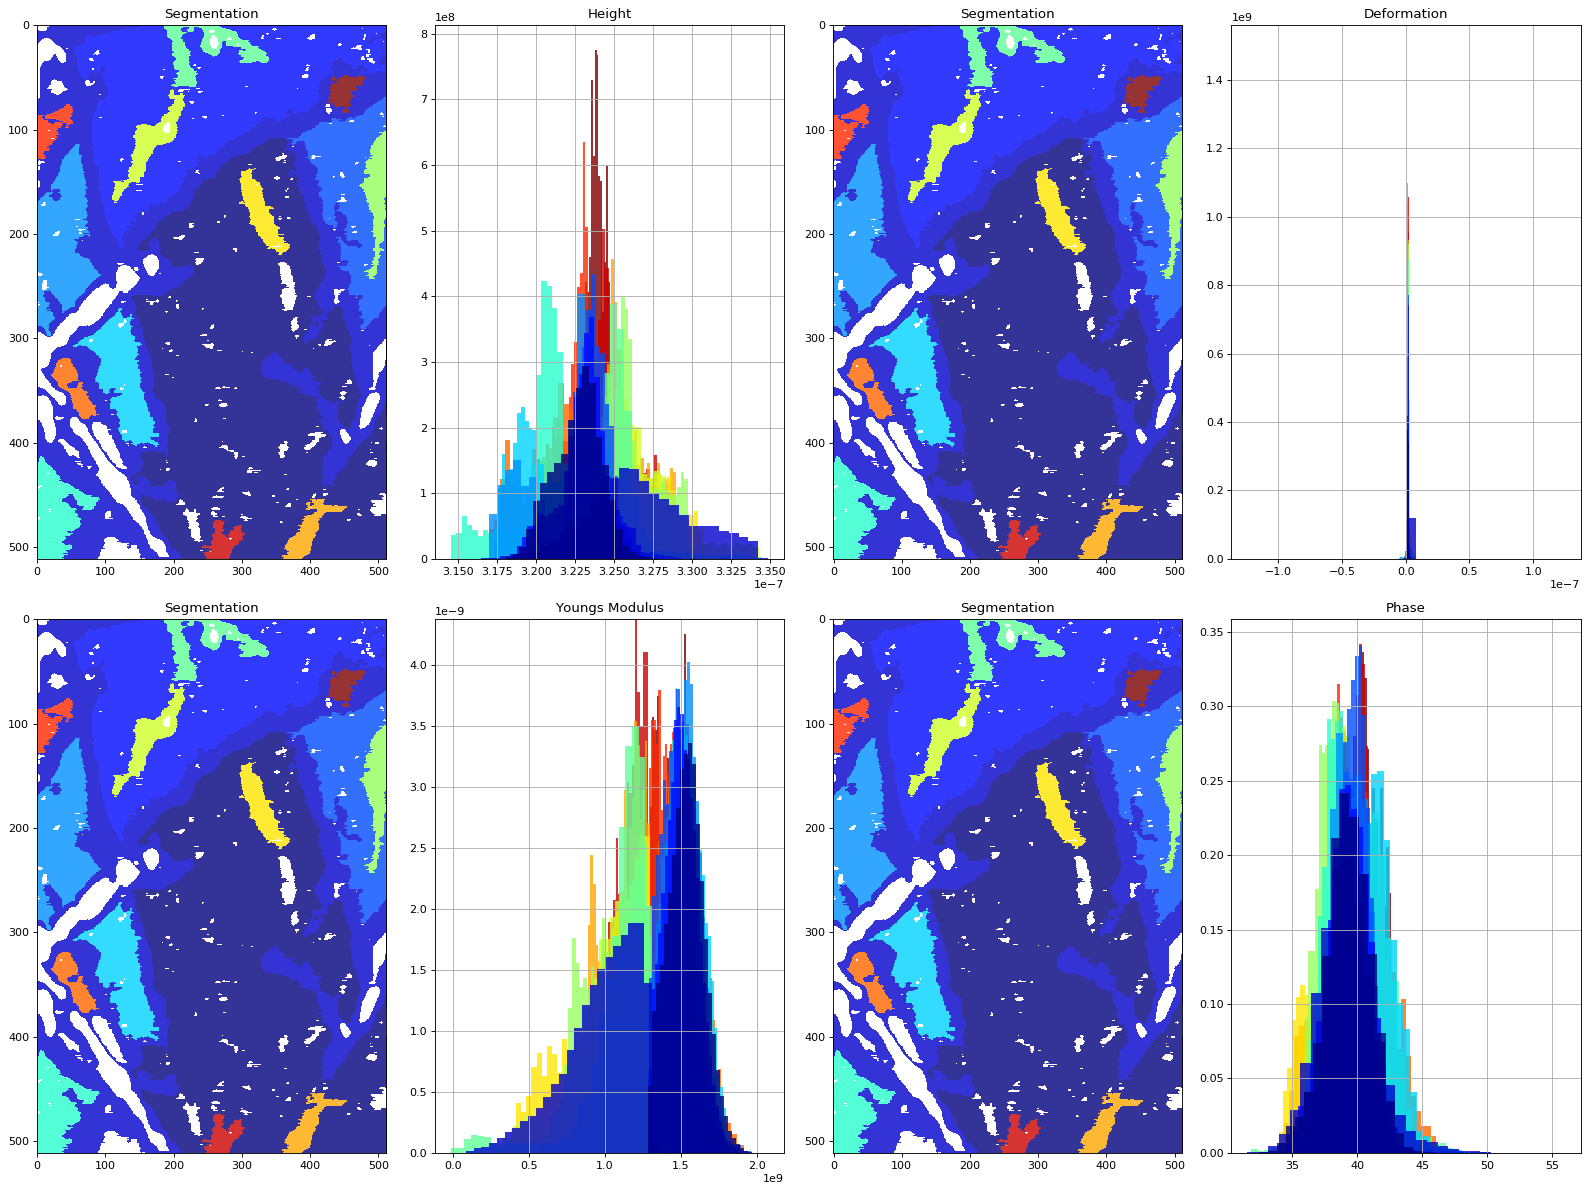

In [95]:
# Distributions of grains after instance segmentation
mm.show_distributions_together(post_labels, no_outliers_data, data_type)


In [100]:
# Apply instance segmentation (persistence watershed)
seg = seg_water.SegmenterWatershed()
height_id = data_properties.index("Height")
height_data = data[:, :, height_id]

thresh = 0.4 # TODO: change to 0.01 for cAMF and AMFM
labels = seg.fit_transform(height_data, outliers, thresh)


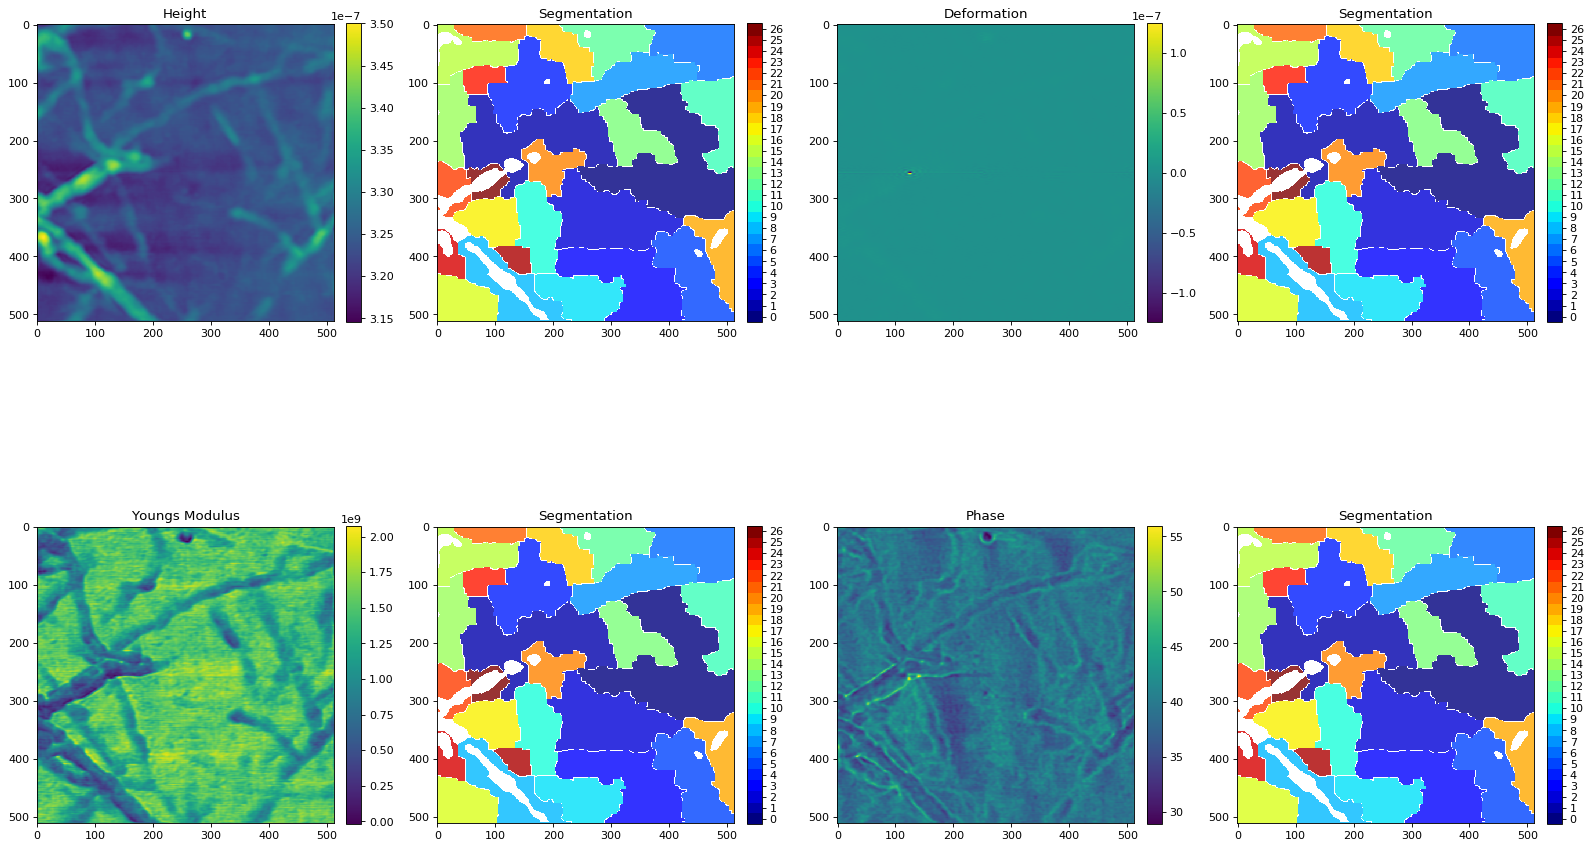

In [101]:
# Instance (grains) segmentation of properties
mm.show_classification(labels, data, data_type)


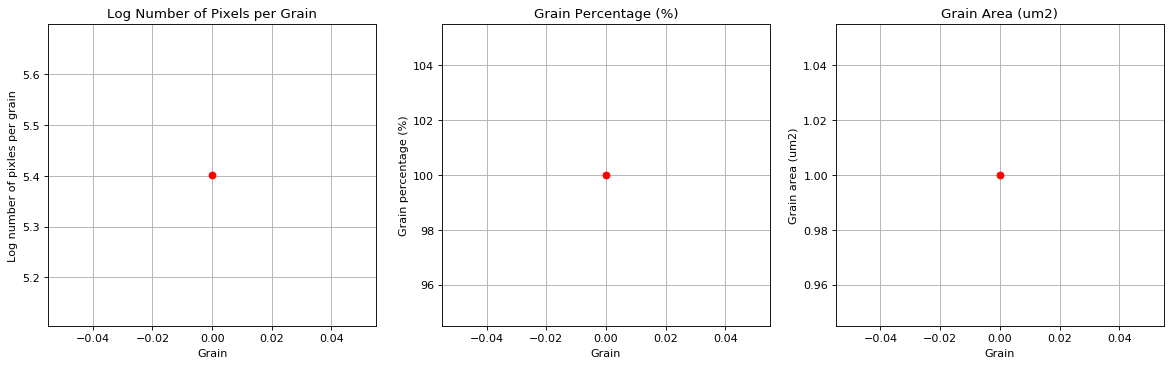

In [98]:
# Show grain area distribution after instance segmentation
mm.show_grain_area_distribution(labels, data_type, data_subtype)

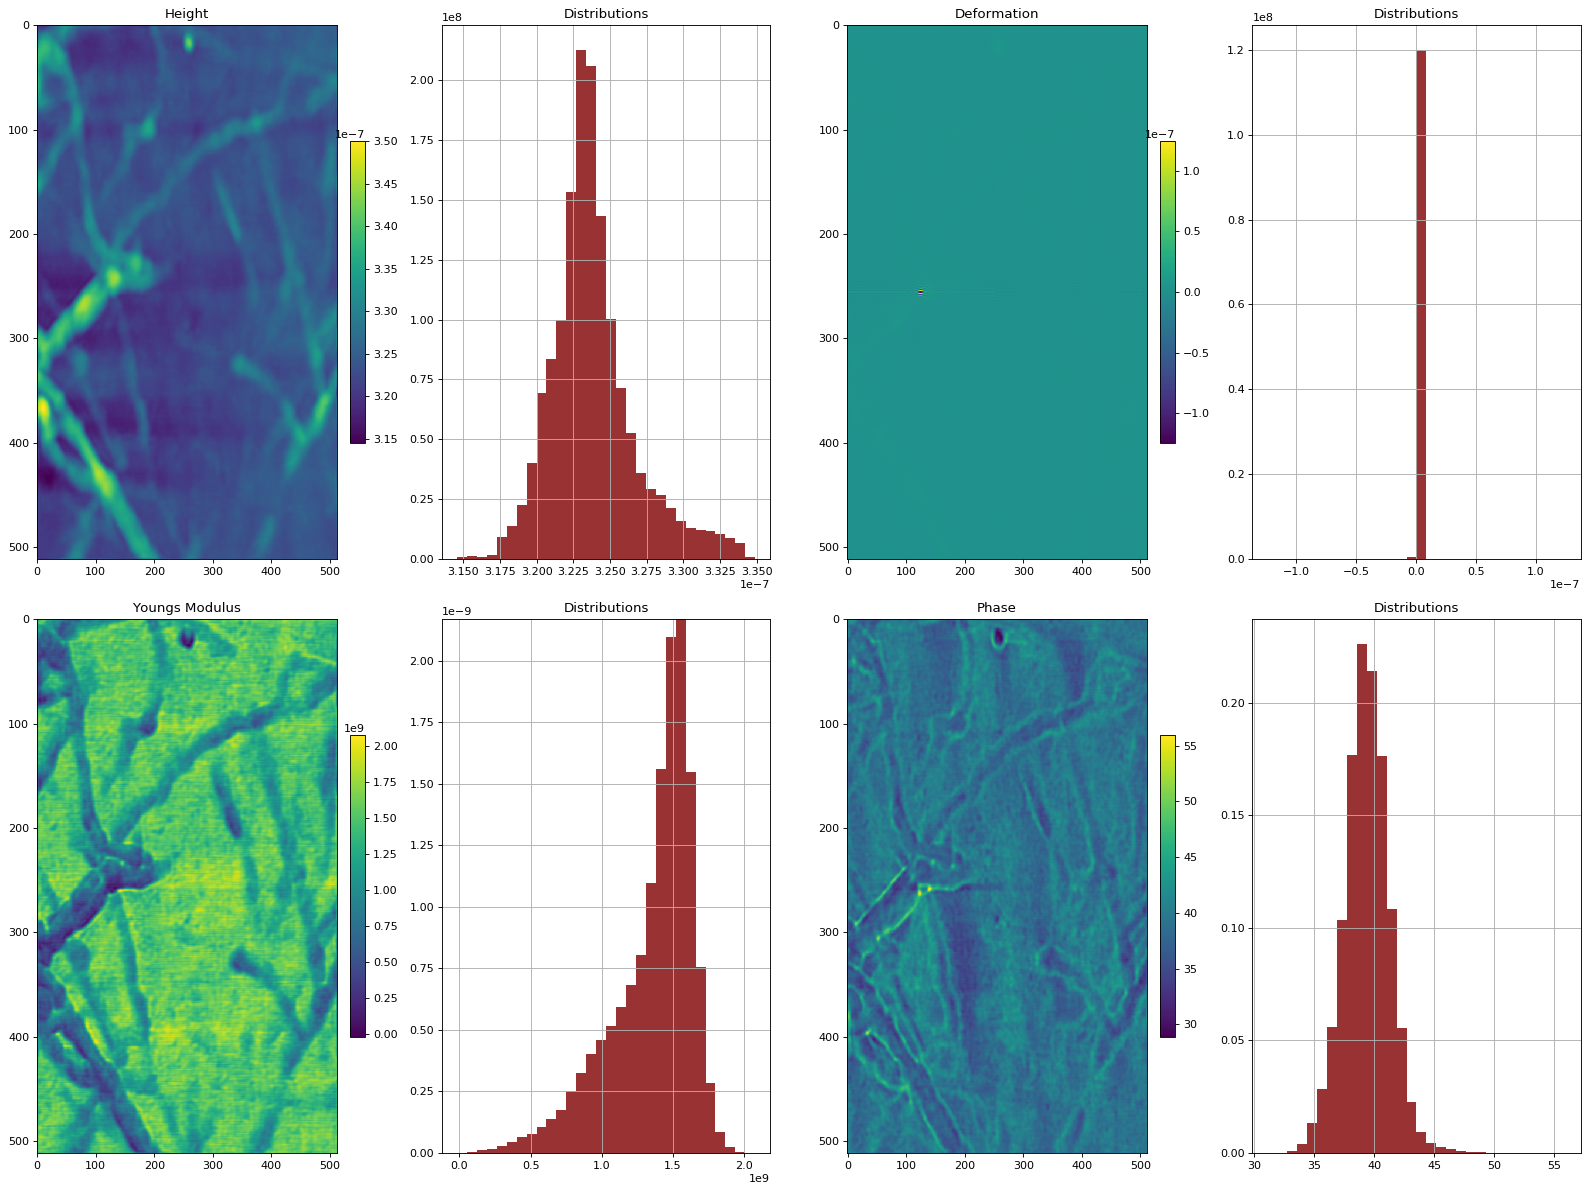

In [99]:
# Distributions of grains after instance segmentation
mm.show_classification_distributions(labels, data, data_type)
